Импорт библиотек и подключение диска

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras import optimizers

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Импорт и первичное исследование данных

In [ ]:
data = pd.read_excel("gdrive/MyDrive/Colab Notebooks/train.xlsx", nrows=100)

In [ ]:
testdata = pd.read_excel("gdrive/MyDrive/Colab Notebooks/test.xlsx", nrows=100)

In [ ]:
data = data.rename(mapper=lambda x: x.split()[0], axis=1)
testdata = testdata.rename(mapper=lambda x: x.split()[0], axis=1)

In [ ]:
data

,Rain,Fertilizer,Temperatue,Nitrogen,Phosphorus,Potassium,Yeild
0,1230,80,28,80,24,20,12
1,480,60,36,70,20,18,8
2,1250,75,29,78,22,19,11
3,450,65,35,70,19,18,9
4,1200,80,27,79,22,19,11
...,...,...,...,...,...,...,...
85,450,70,36,72,25,18,8
86,1250,77,28,76,22,19,10
87,475,60,39,70,20,17,8
88,1200,75,28,77,23,19,11


Разбиение данных и исследование корреляции

In [ ]:
X = data.copy()
y = X.pop("Yeild")

In [ ]:
X_test = testdata.copy()
y_test = X_test.pop("Yeild")

<Axes: >

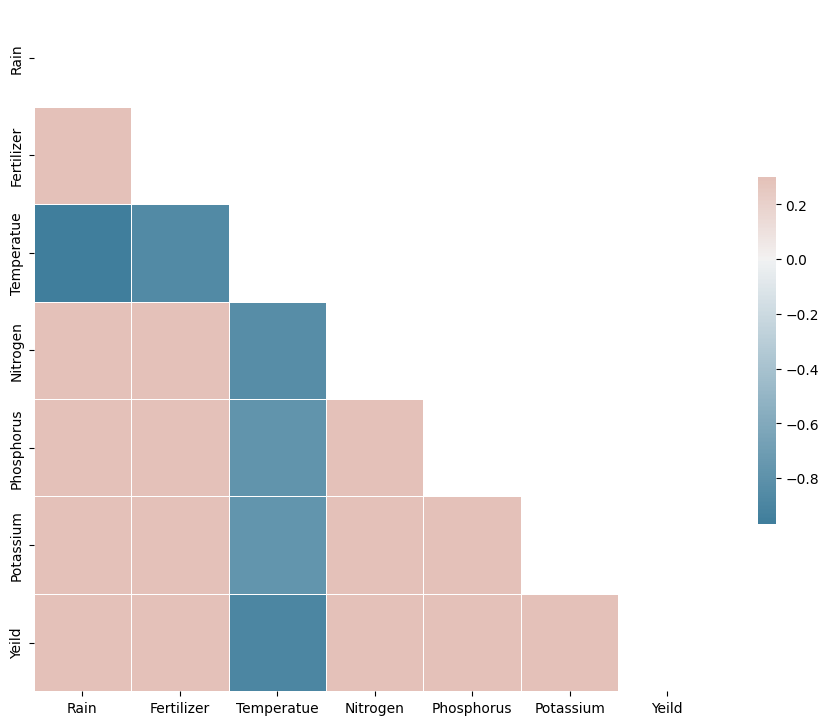

In [ ]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.11)

Шкалирование данных

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
scalar.fit(X_train)
X_train_s = scalar.transform(X_train)
X_valid_s = scalar.transform(X_valid)
X_test_s = scalar.transform(X_test)

Обучение модели

In [ ]:
#
# Set up the network
#
network = models.Sequential()
network.add(layers.Dense(7, activation='sigmoid', input_shape=(6,)))
network.add(layers.Dense(1))
#
# Configure the network with optimizer, loss function and accuracy
#
network.compile(optimizer=optimizers.SGD(learning_rate=0.01,
                                         momentum=0.1,
                                         nesterov=True),
                loss='mse',
                metrics=['mse'])
#
# Create training and test split

# Fit the network
#
history = network.fit(X_train_s, y_train,
                    validation_data=(X_valid_s, y_valid),
                    epochs=70,
                    batch_size=2)

Epoch 1/70
40/40 [==============================] - 1s 8ms/step - loss: 17.7166 - mse: 17.7166 - val_loss: 2.4100 - val_mse: 2.4100
Epoch 2/70
40/40 [==============================] - 0s 3ms/step - loss: 1.6958 - mse: 1.6958 - val_loss: 1.4710 - val_mse: 1.4710
Epoch 3/70
40/40 [==============================] - 0s 3ms/step - loss: 1.1982 - mse: 1.1982 - val_loss: 1.0908 - val_mse: 1.0908
Epoch 4/70
40/40 [==============================] - 0s 2ms/step - loss: 0.8914 - mse: 0.8914 - val_loss: 0.7744 - val_mse: 0.7744
Epoch 5/70
40/40 [==============================] - 0s 3ms/step - loss: 0.7144 - mse: 0.7144 - val_loss: 0.6028 - val_mse: 0.6028
Epoch 6/70
40/40 [==============================] - 0s 3ms/step - loss: 0.6150 - mse: 0.6150 - val_loss: 0.5141 - val_mse: 0.5141
Epoch 7/70
40/40 [==============================] - 0s 3ms/step - loss: 0.5772 - mse: 0.5772 - val_loss: 0.4512 - val_mse: 0.4512
Epoch 8/70
40/40 [==============================] - 0s 3ms/step - loss: 0.5358 - mse: 0.

Предсказание на train

In [ ]:
train_pred = network.predict(X_train_s)

3/3 [==============================] - 0s 4ms/step


In [ ]:
1 - np.sum((train_pred.T[0] - y_train.to_numpy())**2) / (np.var(y_train) * 80) # Детерминация

0.892956553341286

Предсказание на test

In [ ]:
test_pred = network.predict(X_test_s)

1/1 [==============================] - 0s 23ms/step


In [ ]:
test_pred

array([[10.872639 ],
       [ 6.62351  ],
       [10.315604 ],
       [ 6.7182536],
       [11.111124 ],
       [ 7.429877 ],
       [11.283827 ],
       [ 7.755755 ],
       [11.272566 ]], dtype=float32)

In [ ]:
1 - np.sum((test_pred.T[0] - y_test.to_numpy())**2) / (np.var(y_test) * 9) # Детерминация

0.6881941205272597

Сравнение предсказаний с реальными данными

<Axes: >

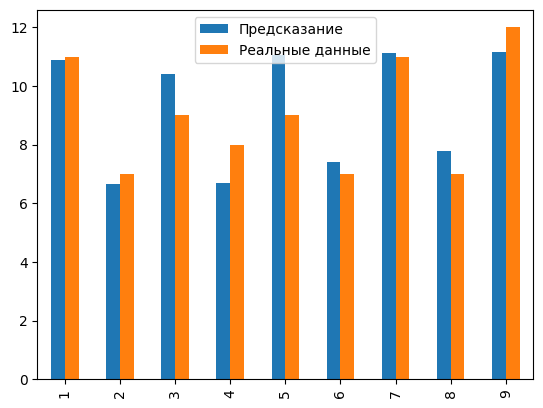

In [ ]:
pd.DataFrame(np.array([test_pred.T[0], y_test]).T, columns=["Предсказание", "Реальные данные"], index=[1,2,3,4,5,6,7,8,9]).plot.bar()

Эксперименты

In [ ]:
z = [[1200,	10,	10,	10,	10,	a] for a in range(1, 80)]

In [ ]:
pred = network.predict(scalar.transform(z))

3/3 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


[Text(0.5, 0, 'Калий (фунтов на акр)'),
 Text(0, 0.5, 'Урожайность (тонн на акр)')]

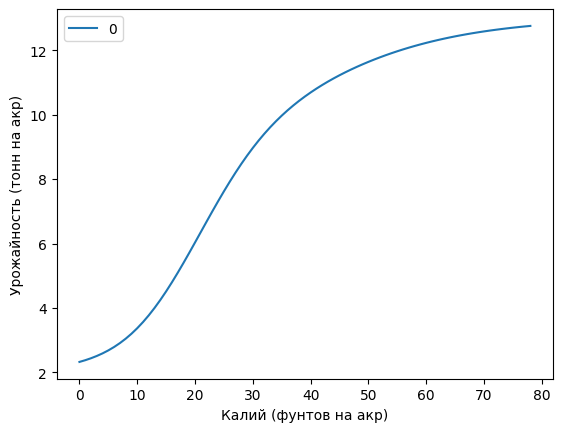

In [ ]:
ax = sns.lineplot(pred)
ax.set(xlabel='Калий (фунтов на акр)', ylabel='Урожайность (тонн на акр)')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 121ms/step


[Text(0.5, 0, 'Осадки (мм)'), Text(0, 0.5, 'Урожайность (тонн на акр)')]

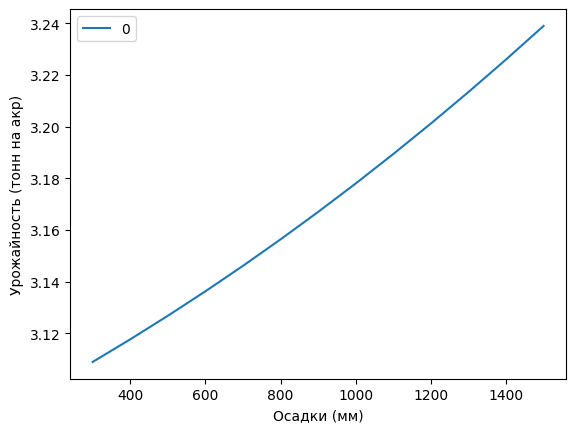

In [ ]:
z = [[a,	10,	10,	10,	10,	10] for a in range(300, 1600, 100)]
pred = network.predict(scalar.transform(z))
ax = sns.lineplot(pd.DataFrame(pred, index=list(range(300, 1600, 100))))
ax.set(xlabel='Осадки (мм)', ylabel='Урожайность (тонн на акр)')

3/3 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


[Text(0.5, 0, 'Температура'), Text(0, 0.5, 'Урожайность')]

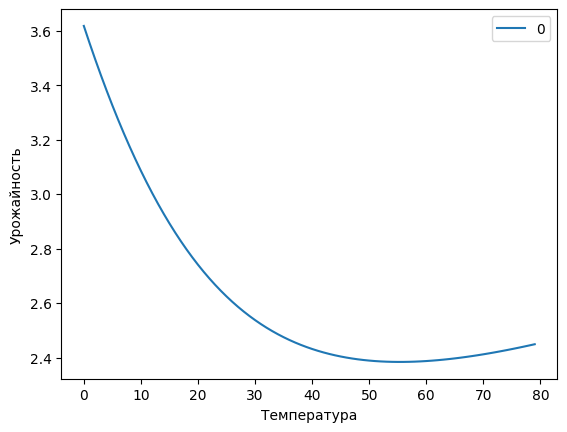

In [ ]:
z = [[10,	10, a,	10,	10,	10] for a in range(0, 80)]
pred = network.predict(scalar.transform(z))
ax = sns.lineplot(pd.DataFrame(pred, index=list(range(0, 80))))
ax.set(xlabel='Температура', ylabel='Урожайность')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3/3 [==============================] - 0s 9ms/step


[Text(0.5, 0, 'Фосфор (фунтов на акр)'),
 Text(0, 0.5, 'Урожайность (тонн на акр)')]

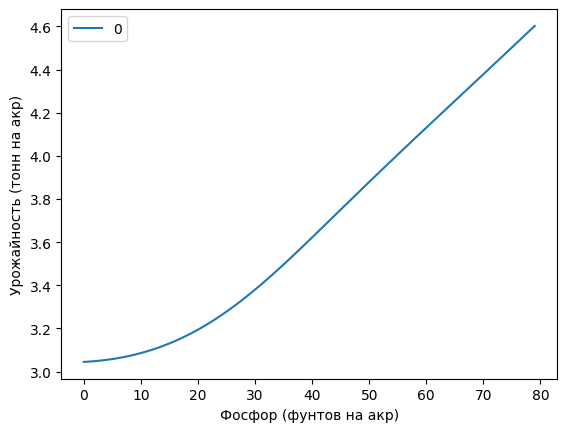

In [ ]:
z = [[10,	10, 10,	10,	a,	10] for a in range(0, 80)]
pred = network.predict(scalar.transform(z))
ax = sns.lineplot(pd.DataFrame(pred, index=list(range(0, 80))))
ax.set(xlabel='Фосфор (фунтов на акр)', ylabel='Урожайность (тонн на акр)')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3/3 [==============================] - 0s 6ms/step


[Text(0.5, 0, 'Азот (фунтов на акр)'),
 Text(0, 0.5, 'Урожайность (тонн на акр)')]

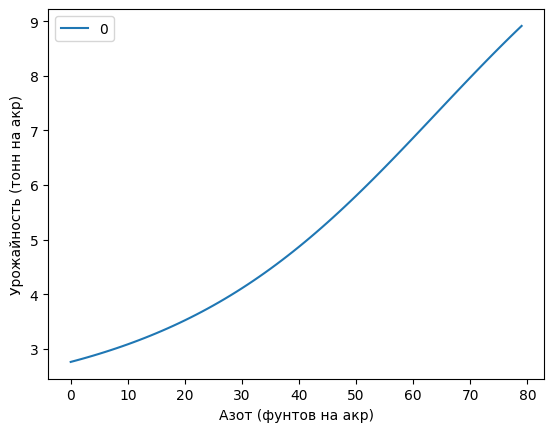

In [ ]:
z = [[10,	10, 10,	a,	10,	10] for a in range(0, 80)]
pred = network.predict(scalar.transform(z))
ax = sns.lineplot(pd.DataFrame(pred, index=list(range(0, 80))))
ax.set(xlabel='Азот (фунтов на акр)', ylabel='Урожайность (тонн на акр)')

График ошибки

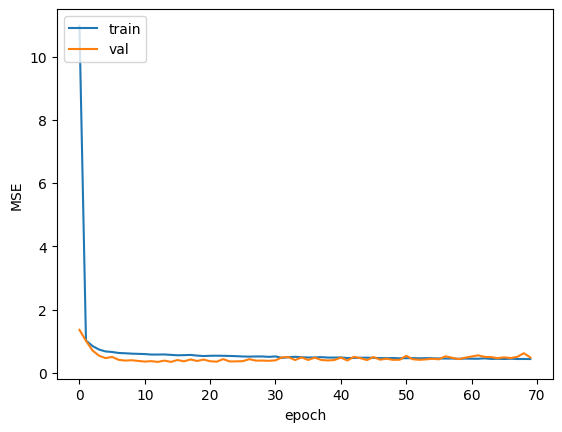

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Решение методов линейной регрессии

In [ ]:
sol = np.linalg.lstsq(X_train, y_train)

<ipython-input-84-da1b8843180a>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sol = np.linalg.lstsq(X_train, y_train)


<Axes: >

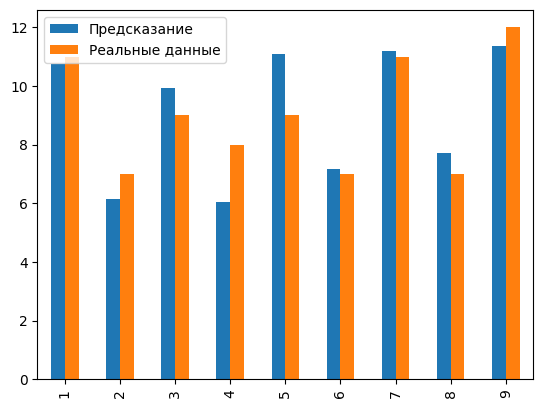

In [ ]:
pd.DataFrame(np.array([sol[0] @ X_test.T, y_test]).T, columns=["Предсказание", "Реальные данные"], index=[1,2,3,4,5,6,7,8,9]).plot.bar()

In [ ]:
mse_test_lsq = ((sol[0] @ X_test.T - y_test.to_numpy())**2).mean()

In [ ]:
np.sum((sol[0] @ X_train.T - y_train.to_numpy())**2) / (np.var(y_train) * 80) # Детерминация

0.10311476419930066

In [ ]:
np.sum((sol[0] @ X_test.T - y_test.to_numpy())**2) / (np.var(y_test) * 9) # Детерминация

0.3618379403231536